# Hotel Reservations dataset analysis

The dataset contains information about hotel room reservations and whether they have been canceled or not. Our task will be to predict whether the reservation will be canceled.

[Data source](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../data/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# Meaning of features ([source](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)):
- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [7]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

At first look, there are no empty values. Let's see how features are correlated
with each other.

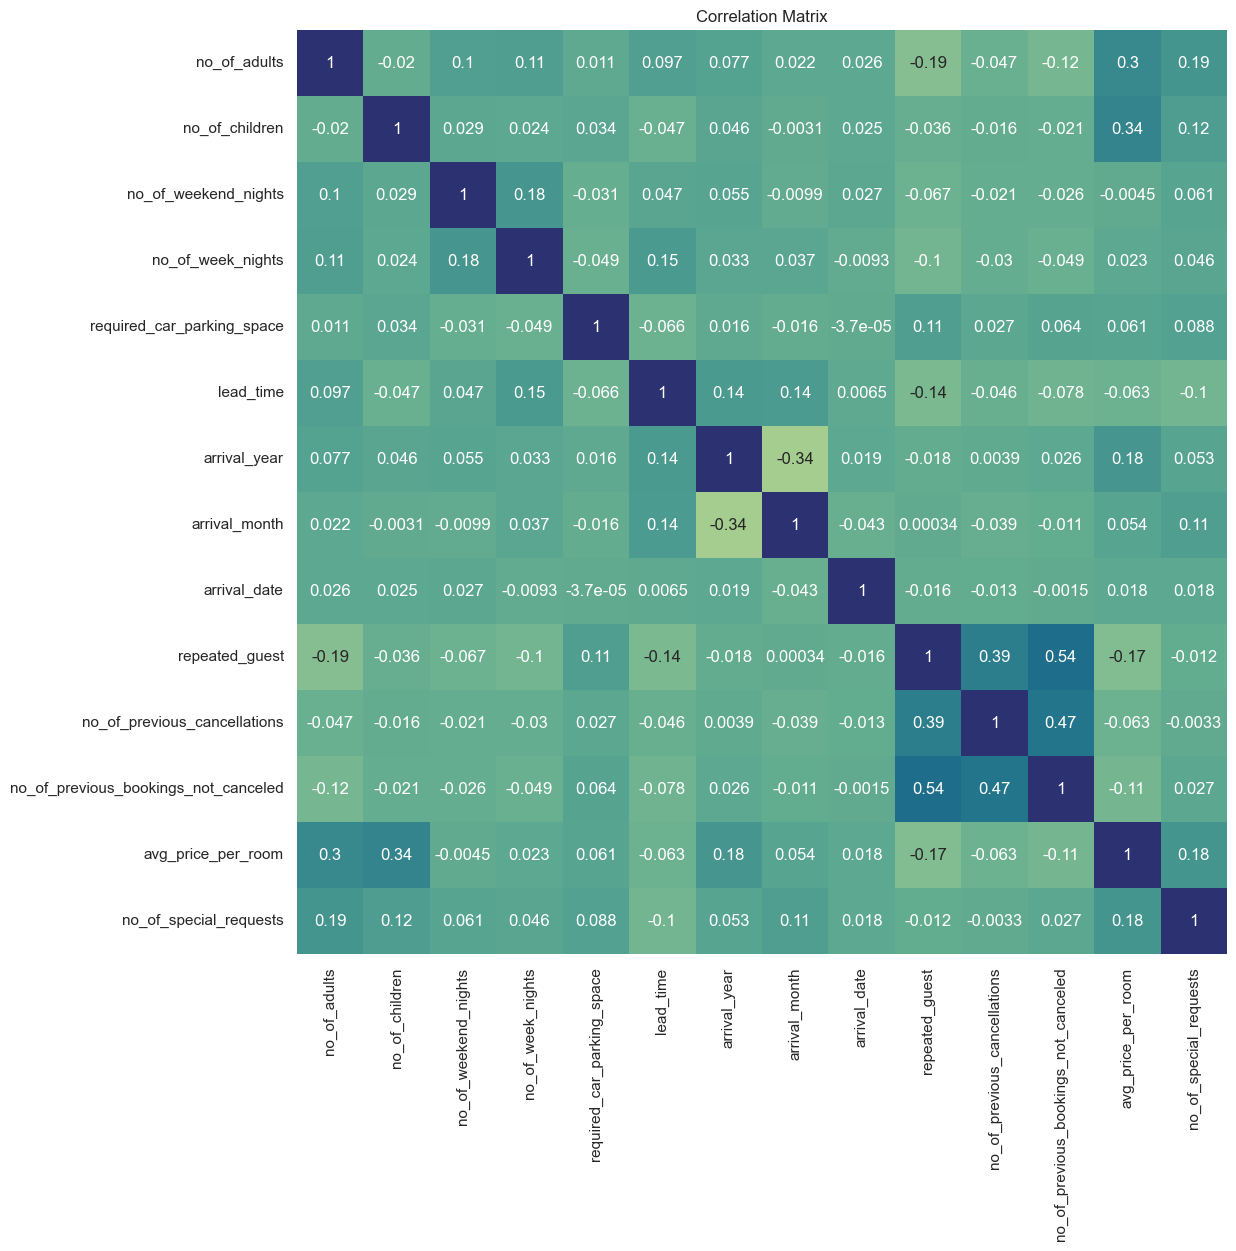

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=df.corr(numeric_only=True), cbar=False, annot=True, cmap='crest', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

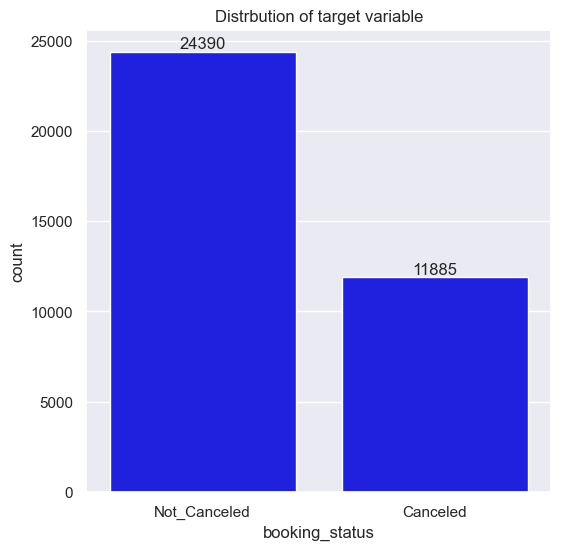

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(data=df, x='booking_status',
                   color='blue')
ax.bar_label(ax.containers[0])
plt.title('Distrbution of target variable')
plt.show()

In [10]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
cat_cols = ['type_of_meal_plan', 'room_type_reserved',
            'market_segment_type', 'required_car_parking_space',
            'repeated_guest']
discrete_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                 'no_of_week_nights', 'no_of_previous_bookings_not_canceled',
                 'no_of_previous_cancellations', 'no_of_special_requests']
continous_cols = ['lead_time', 'avg_price_per_room']

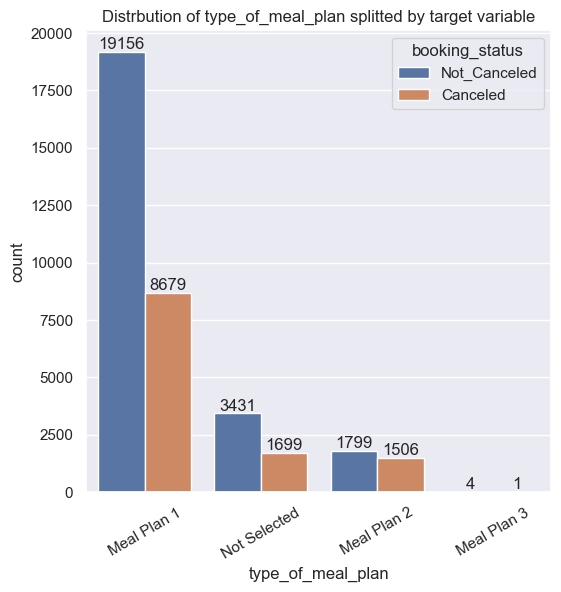

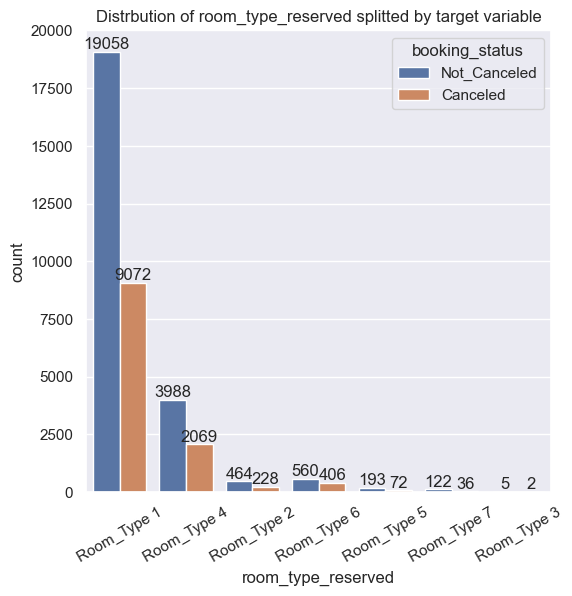

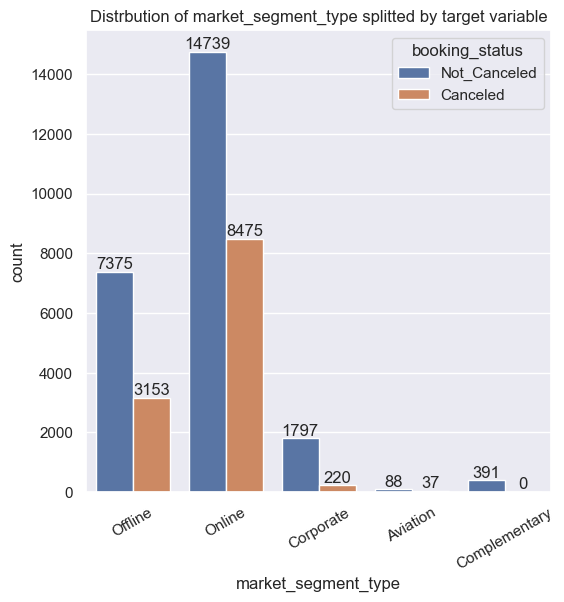

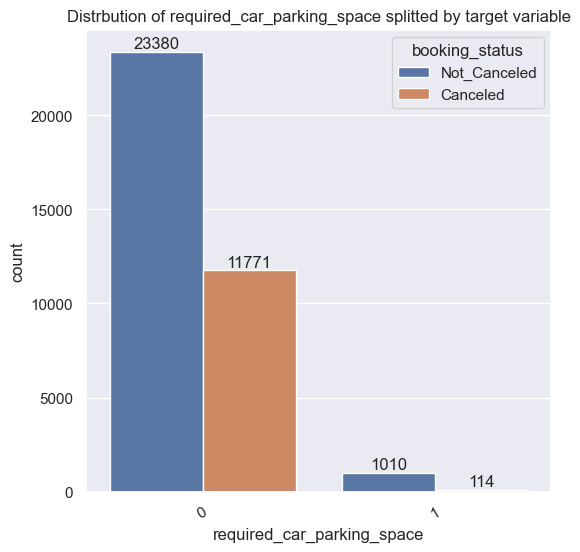

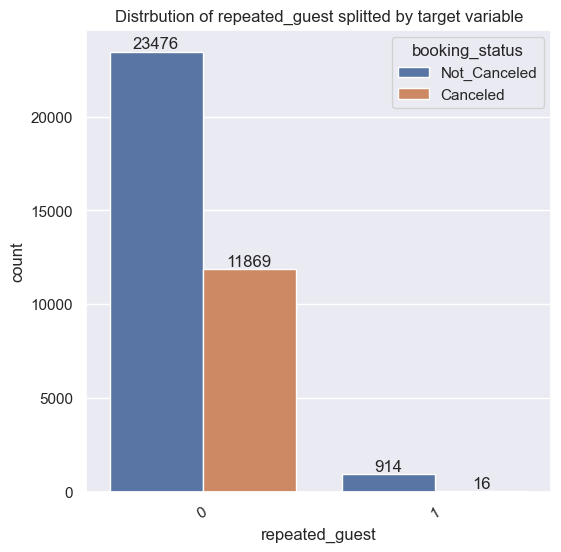

In [12]:
for col in cat_cols:
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(data=df, x=col, hue='booking_status')
    plt.xticks(rotation=30)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

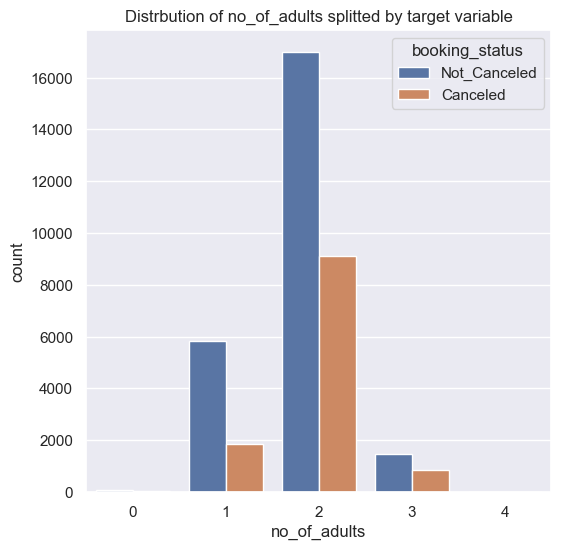

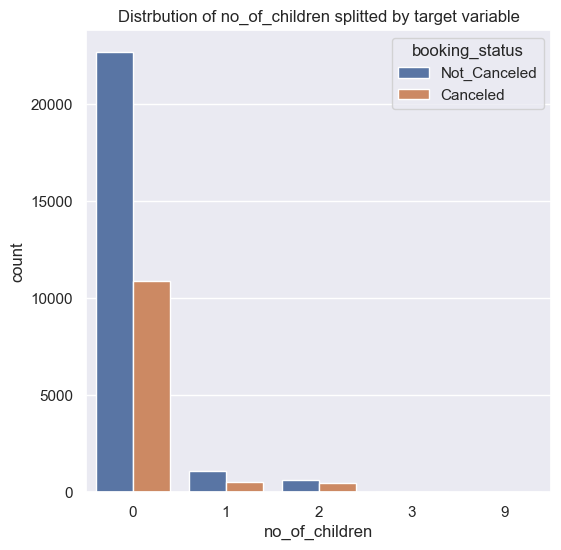

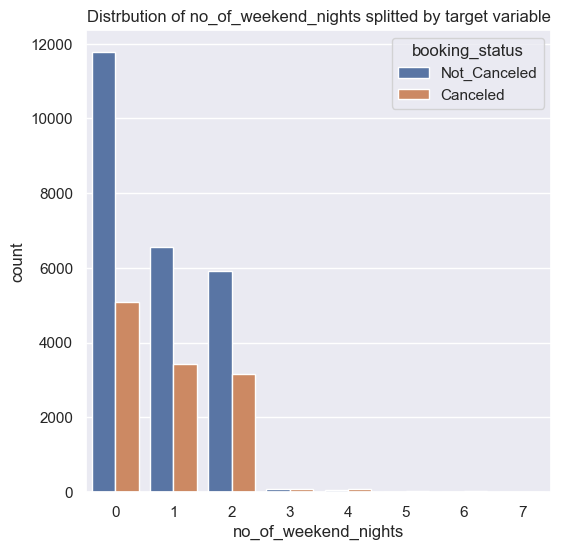

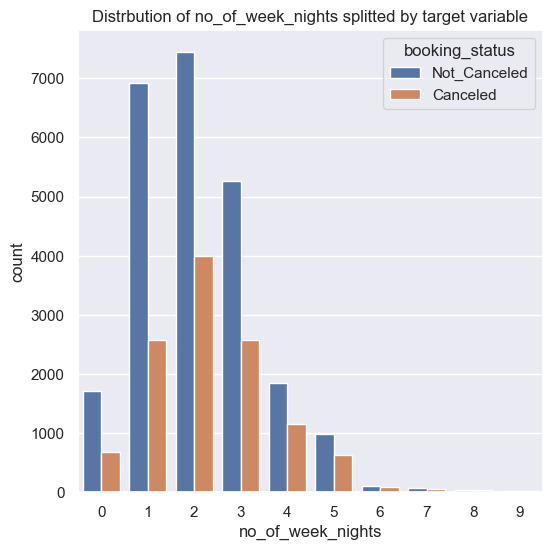

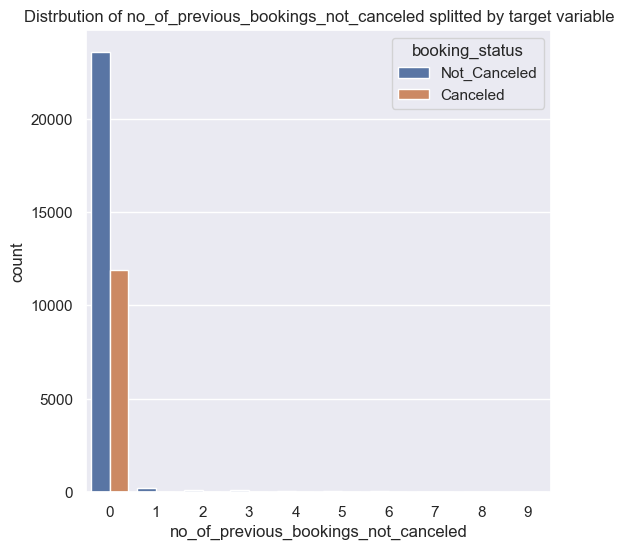

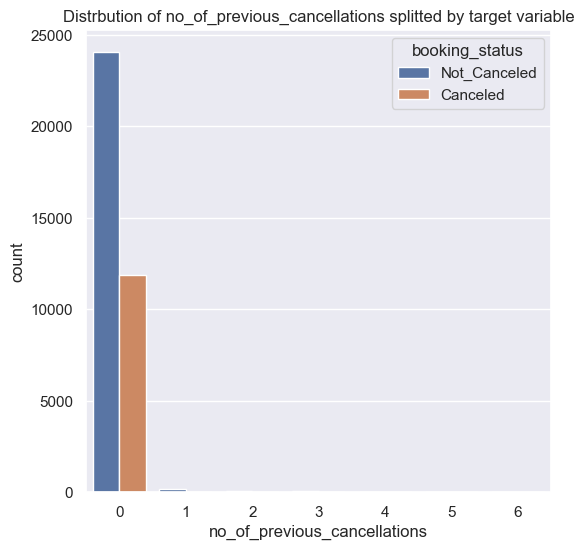

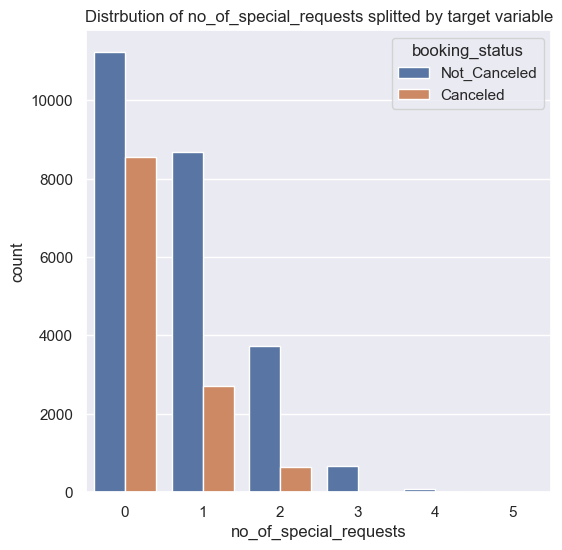

In [13]:
for col in discrete_cols:
    plt.figure(figsize=(6, 6))
    # I have removed the outliers here to make plots more readable
    sns.countplot(data=df[df[col] < 10], x=col, hue='booking_status')
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

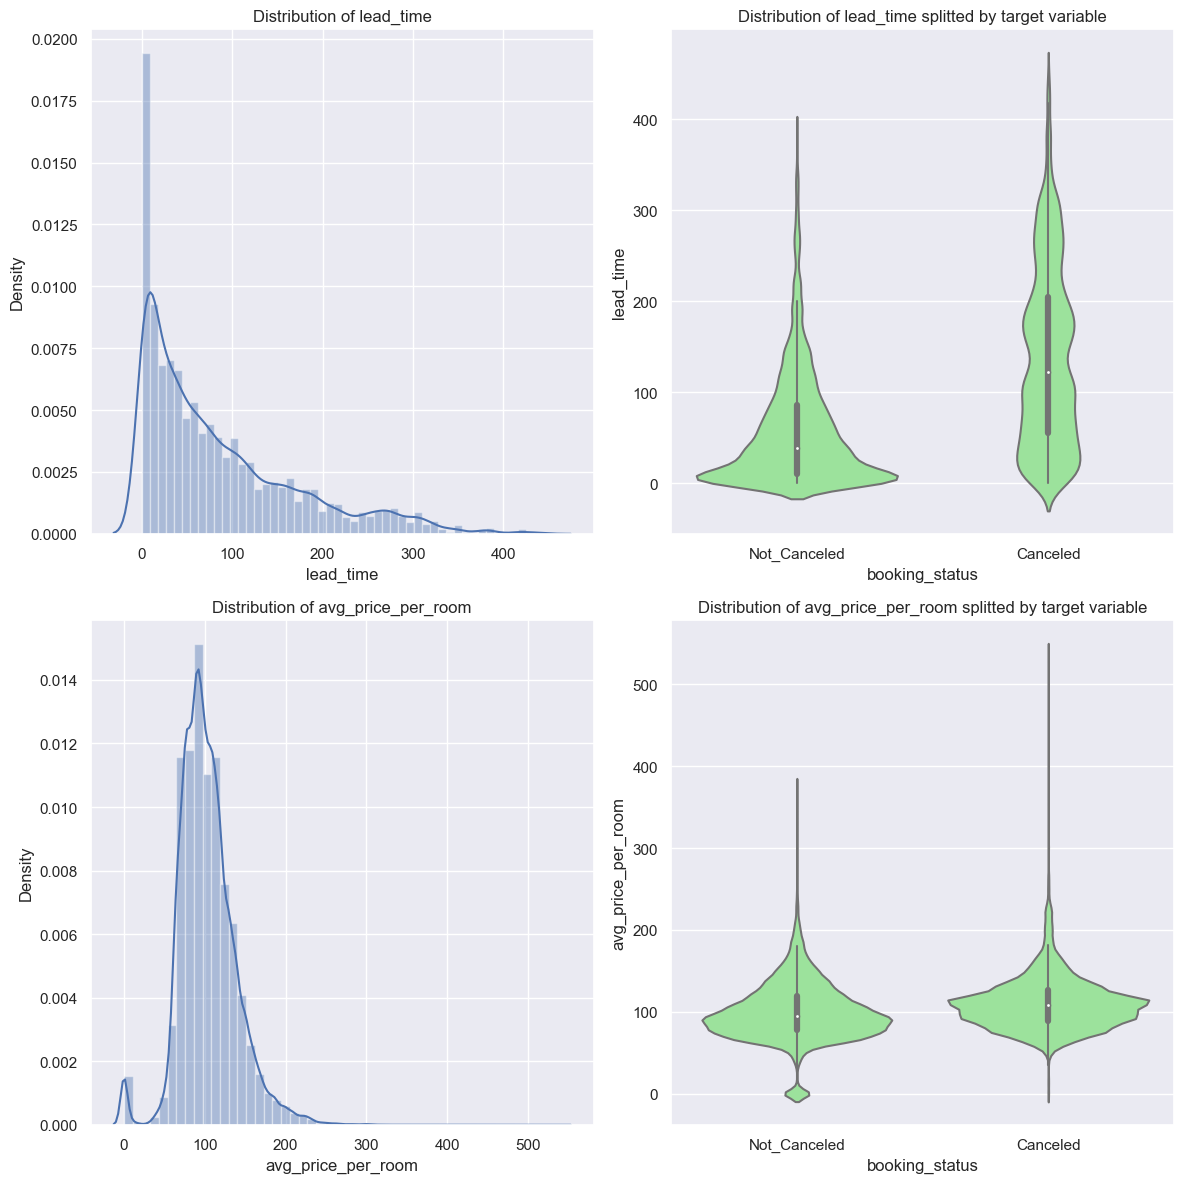

In [14]:
fig, ax = plt.subplots(len(continous_cols), 2, figsize=(12, 6*len(continous_cols)))

for i, col in enumerate(continous_cols):
    sns.distplot(df[col], ax=ax[i, 0])
    ax[i, 0].set_title(f'Distribution of {col}')

    sns.violinplot(data=df, x='booking_status', y=col, color='lightgreen', ax=ax[i, 1])
    ax[i, 1].set_title(f'Distribution of {col} splitted by target variable')

plt.tight_layout()
plt.show()

# First observations:
 - Repeated guests almost never cancel reservations
 - Complementary reservations were never cancelled
 - Reservations were more likely to be cancelled if the time between arrival date and date of booking was longer
 - There are values **0** in **'avg_price_per_room'** column. We will have a look at this and check if these are some mistakes or missing values

In [15]:
df[df['avg_price_per_room'] == 0].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,545,545.000000,545.000000,545.000000,545.000000,545,545.000000,545,545.000000,545.000000,545.000000,545.000000,545,545.000000,545.000000,545.000000,545.0,545.000000,545
unique,545,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,INN00064,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Complementary,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,450,NaN,388,NaN,NaN,NaN,NaN,354,NaN,NaN,NaN,NaN,NaN,539
mean,NaN,1.451376,0.093578,0.284404,1.148624,NaN,0.049541,NaN,22.772477,2017.572477,8.016514,14.763303,NaN,0.233028,0.150459,1.768807,0.0,0.757798,NaN
std,NaN,0.540563,0.388785,0.576688,0.989802,NaN,0.217195,NaN,54.461464,0.495174,3.333446,8.278967,NaN,0.423148,0.623767,5.045905,0.0,0.945218,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,0.000000,2017.000000,6.000000,9.000000,NaN,0.000000,0.000000,0.000000,0.0,0.000000,NaN
50%,NaN,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,4.000000,2018.000000,9.000000,14.000000,NaN,0.000000,0.000000,0.000000,0.0,1.000000,NaN
75%,NaN,2.000000,0.000000,0.000000,2.000000,NaN,0.000000,NaN,12.000000,2018.000000,11.000000,21.000000,NaN,0.000000,0.000000,0.000000,0.0,1.000000,NaN


In [16]:
df[df['avg_price_per_room'] == 0]['market_segment_type'].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [17]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [18]:
df[df['market_segment_type'] == 'Complementary'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,391,391.000000,391.000000,391.000000,391.000000,391,391.000000,391,391.000000,391.000000,391.000000,391.000000,391,391.000000,391.000000,391.000000,391.000000,391.000000,391
unique,391,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1
top,INN00064,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Complementary,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,370,NaN,247,NaN,NaN,NaN,NaN,391,NaN,NaN,NaN,NaN,NaN,391
mean,NaN,1.483376,0.125320,0.329923,1.240409,NaN,0.079284,NaN,12.035806,2017.644501,7.723785,15.017903,NaN,0.322251,0.209719,2.475703,3.141765,0.882353,NaN
std,NaN,0.549223,0.443932,0.612770,1.004351,NaN,0.270527,NaN,35.289045,0.479277,3.473035,8.773339,NaN,0.467937,0.728192,5.811465,15.512972,0.995616,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,0.000000,2017.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,2.000000,2018.000000,9.000000,15.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
75%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,8.000000,2018.000000,11.000000,22.000000,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,NaN


In [19]:
df[df['avg_price_per_room'] == 0]['booking_status'].value_counts()

booking_status
Not_Canceled    539
Canceled          6
Name: count, dtype: int64

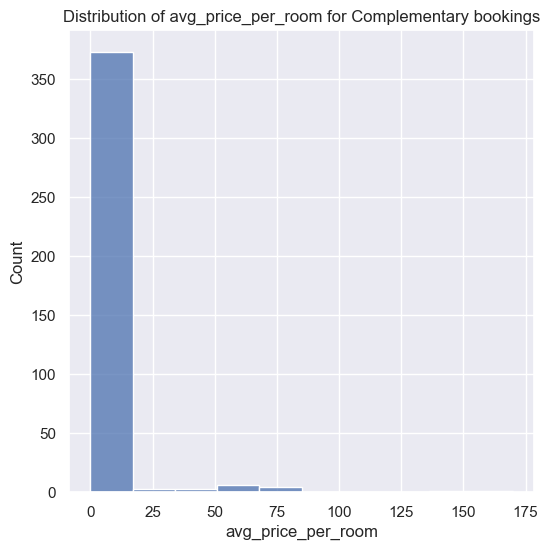

In [20]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df[df['market_segment_type'] == 'Complementary'],
             x='avg_price_per_room')
plt.title('Distribution of avg_price_per_room for Complementary bookings')
plt.show()

It looks like **'avg_price_per_room'** = 0 is not a mistake. Those reservations were almost never cancelled and what's more interesting they have only 2 unique values in **'market_segment_type'**:
Complementary and Online. Another interesting fact is that almost all Complementary bookings were "free".

My hypothesis: **'avg_price_per_room'** = 0 means that the booking was made with some kind of discount/free coupon that came from the complementary market or was redeemed online, this would explain only 2 values in the 'market_segment_type' column and why they weren't cancelled most of the times. Later we can create a column that will tell if the booking was a **gift**.

# How are reservations distributed in time?

In [21]:
# Combine 3 cols to create a date of arrival column 
df['date_of_arrival'] = df['arrival_date'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_year'].astype(str)

df['date_of_arrival'] = pd.to_datetime(df['date_of_arrival'], format='%d/%m/%Y')

df['date_of_arrival'].head()

ValueError: day is out of range for month, at position 492. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [22]:
for i in range(4000):
    try:
        pd.to_datetime(df.iloc[i]['date_of_arrival'], format='%d/%m/%Y')
    except:
        print(df.iloc[i]['date_of_arrival'])

29/2/2018
29/2/2018


It looks like our data sometimes contains an incorrect date. Let's see how many records contains it.

In [23]:
print(len(df[df['date_of_arrival'] == '29/2/2018']))

df[df['date_of_arrival'] == '29/2/2018']

37


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,2018,2,29,Online,1,1,0,61.43,0,Canceled,29/2/2018
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,2018,2,29,Online,0,0,0,102.05,0,Canceled,29/2/2018
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,2018,2,29,Offline,0,0,0,45.50,0,Not_Canceled,29/2/2018
6343,INN06344,1,0,1,1,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled,29/2/2018
7648,INN07649,2,1,1,5,Meal Plan 1,0,Room_Type 1,35,2018,2,29,Online,0,0,0,98.10,1,Canceled,29/2/2018
8000,INN08001,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,183.00,1,Not_Canceled,29/2/2018
8989,INN08990,1,0,1,2,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled,29/2/2018
9153,INN09154,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,189.75,0,Not_Canceled,29/2/2018
9245,INN09246,2,0,1,3,Meal Plan 1,0,Room_Type 4,15,2018,2,29,Online,0,0,0,85.55,1,Not_Canceled,29/2/2018
9664,INN09665,1,0,1,0,Meal Plan 1,0,Room_Type 4,21,2018,2,29,Online,0,0,0,117.00,0,Not_Canceled,29/2/2018


We have 37 lines with incorrect date. For now we will change it to 28/02, but then we will think about what to do with it.

In [24]:
df['date_of_arrival'] = df['date_of_arrival'].apply(lambda x: '28/2/2018' if x == '29/2/2018' else x)

df['date_of_arrival'] = pd.to_datetime(df['date_of_arrival'], format='%d/%m/%Y')

df['date_of_arrival'].head()

0   2017-10-02
1   2018-11-06
2   2018-02-28
3   2018-05-20
4   2018-04-11
Name: date_of_arrival, dtype: datetime64[ns]

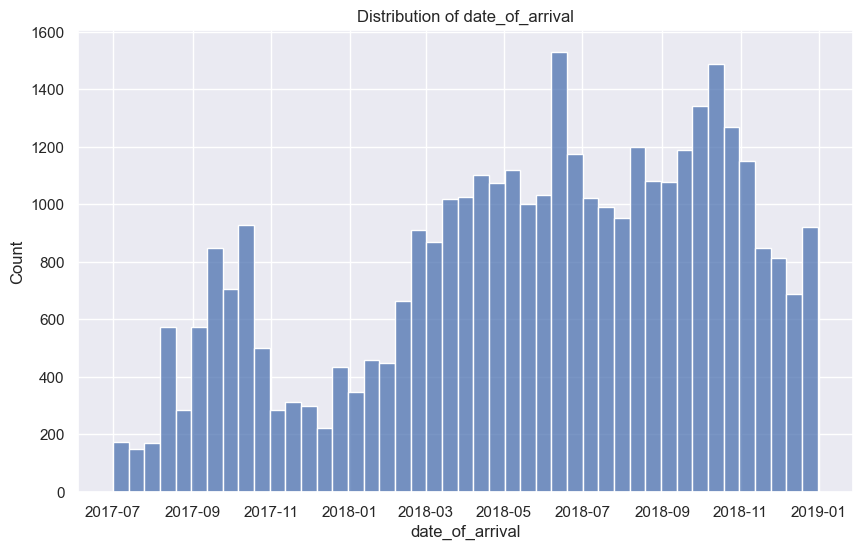

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='date_of_arrival')
plt.title('Distribution of date_of_arrival')
plt.show()

# Are there any duplicates in the data?

In [26]:
df.duplicated().sum()

0

# Do different room types accommodate different numbers of people?

<Figure size 800x600 with 0 Axes>

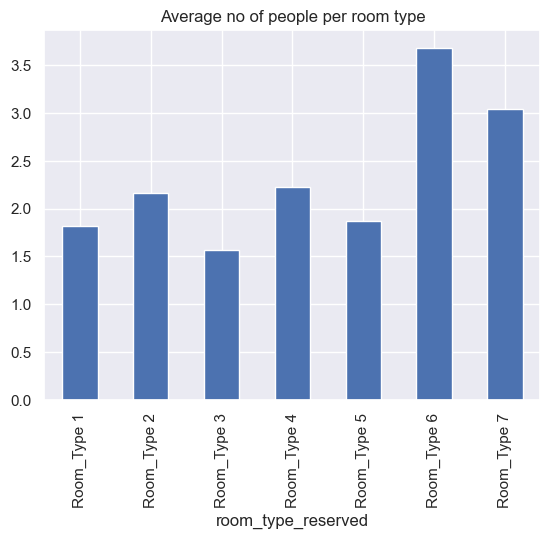

In [27]:
df['no_of_people'] = df['no_of_adults'] + df['no_of_children']

avg_no_of_people = df.groupby('room_type_reserved')['no_of_people'].mean().reset_index()
avg_no_of_people.columns = ['room_type_reserved', 'avg_no_of_people']

plt.figure(figsize=(8, 6))
ax = avg_no_of_people.plot(x='room_type_reserved', y='avg_no_of_people', kind='bar')
plt.title('Average no of people per room type')
ax.get_legend().remove()
plt.show()

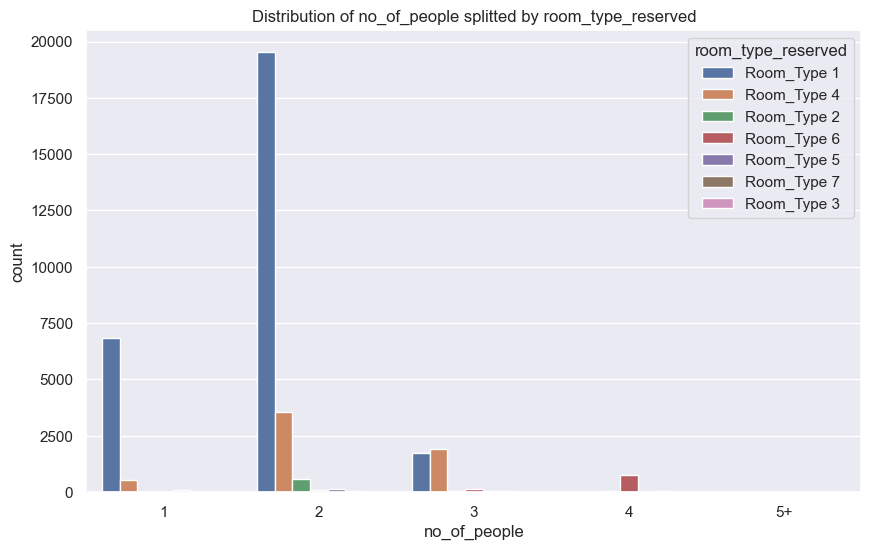

In [28]:
df['no_of_people'] = df['no_of_people'].apply(lambda x: str(x) if x <= 4 else '5+')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_people', hue='room_type_reserved',
              order=['1', '2', '3', '4', '5+'])
plt.title('Distribution of no_of_people splitted by room_type_reserved')
plt.show()

In [29]:
for type in df['room_type_reserved'].unique():
    print(f'Room type: {type}.\n{df[df["room_type_reserved"] == type]["no_of_people"].value_counts().sort_index()}\n')

Room type: Room_Type 1.
no_of_people
1      6847
2     19534
3      1729
4        19
5+        1
Name: count, dtype: int64

Room type: Room_Type 4.
no_of_people
1      556
2     3572
3     1913
4       15
5+       1
Name: count, dtype: int64

Room type: Room_Type 2.
no_of_people
1      18
2     598
3      27
4      46
5+      3
Name: count, dtype: int64

Room type: Room_Type 6.
no_of_people
1      16
2      73
3     117
4     755
5+      5
Name: count, dtype: int64

Room type: Room_Type 5.
no_of_people
1     98
2    117
3     36
4     14
Name: count, dtype: int64

Room type: Room_Type 7.
no_of_people
1     14
2     44
3     29
4     63
5+     8
Name: count, dtype: int64

Room type: Room_Type 3.
no_of_people
1    3
2    4
Name: count, dtype: int64



We can clearly see differences between room types. Now let's look at prices of the rooms.

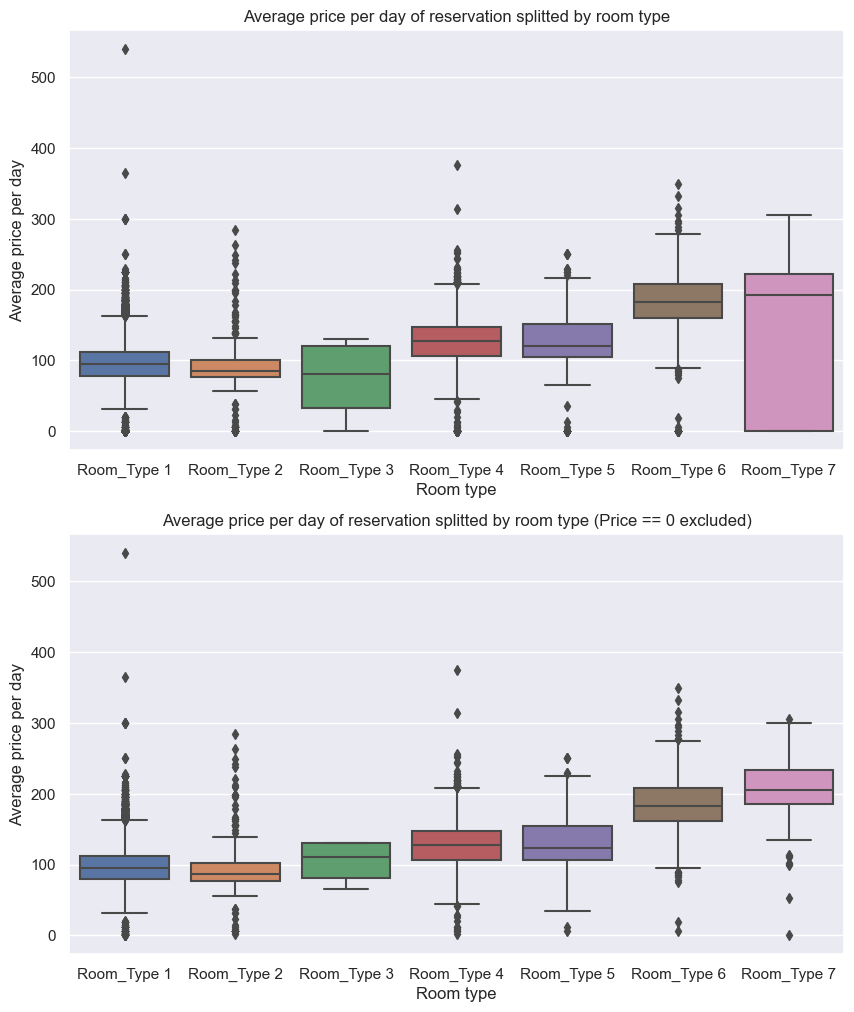

In [30]:
plt.subplots(2, 1, figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.boxplot(data = df, x='room_type_reserved', y='avg_price_per_room',
            order = sorted(df['room_type_reserved'].unique()))
plt.title('Average price per day of reservation splitted by room type')
plt.ylabel('Average price per day')
plt.xlabel('Room type')

plt.subplot(2, 1, 2)
sns.boxplot(data = df[df['avg_price_per_room'] > 0], x='room_type_reserved', y='avg_price_per_room',
            order = sorted(df['room_type_reserved'].unique()))
plt.title('Average price per day of reservation splitted by room type (Price == 0 excluded)')
plt.ylabel('Average price per day')
plt.xlabel('Room type')

plt.show()

# What about wrong dates?

Let's look on records from days before and after the wrong date.

In [33]:
df[(df['arrival_date'] == 28) & (df['arrival_month'] == 2) & (df['arrival_year'] == 2018)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,no_of_people
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,1
314,INN00315,2,0,2,1,Meal Plan 1,0,Room_Type 1,26,2018,...,28,Offline,0,0,0,87.00,0,Not_Canceled,2018-02-28,2
356,INN00357,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,1
486,INN00487,2,0,2,0,Meal Plan 1,0,Room_Type 1,34,2018,...,28,Complementary,0,0,0,6.50,1,Not_Canceled,2018-02-28,2
495,INN00496,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35628,INN35629,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,...,28,Offline,0,0,0,61.00,0,Canceled,2018-02-28,1
36063,INN36064,2,2,2,2,Meal Plan 1,0,Room_Type 6,54,2018,...,28,Online,0,0,0,148.33,0,Canceled,2018-02-28,4
36096,INN36097,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,...,28,Offline,0,0,0,76.00,0,Not_Canceled,2018-02-28,1
36107,INN36108,2,0,2,2,Meal Plan 1,0,Room_Type 1,7,2018,...,28,Offline,0,0,0,87.00,0,Not_Canceled,2018-02-28,2


In [34]:
df[(df['arrival_date'] == 1) & (df['arrival_month'] == 3) & (df['arrival_year'] == 2018)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,no_of_people
221,INN00222,2,0,0,1,Meal Plan 1,0,Room_Type 1,118,2018,...,1,Offline,0,0,0,86.00,0,Not_Canceled,2018-03-01,2
1371,INN01372,2,0,0,4,Meal Plan 1,0,Room_Type 4,37,2018,...,1,Online,0,0,0,95.40,1,Canceled,2018-03-01,2
1735,INN01736,2,0,0,4,Not Selected,0,Room_Type 1,54,2018,...,1,Online,0,0,0,49.43,0,Not_Canceled,2018-03-01,2
2544,INN02545,2,0,0,4,Not Selected,0,Room_Type 1,54,2018,...,1,Online,0,0,0,47.43,0,Canceled,2018-03-01,2
3155,INN03156,2,0,0,2,Meal Plan 1,0,Room_Type 4,1,2018,...,1,Complementary,1,0,1,0.00,1,Not_Canceled,2018-03-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33198,INN33199,1,0,0,2,Meal Plan 1,0,Room_Type 1,8,2018,...,1,Offline,0,0,0,56.00,0,Not_Canceled,2018-03-01,1
33908,INN33909,2,0,2,8,Meal Plan 1,0,Room_Type 4,58,2018,...,1,Online,0,0,0,85.30,1,Not_Canceled,2018-03-01,2
34091,INN34092,2,0,0,5,Meal Plan 1,0,Room_Type 1,49,2018,...,1,Online,0,0,0,76.33,0,Canceled,2018-03-01,2
34887,INN34888,2,0,0,2,Meal Plan 1,0,Room_Type 1,55,2018,...,1,Online,0,0,0,84.80,1,Not_Canceled,2018-03-01,2


# Final Conclusions:
- Repeated guests almost never cancel reservations
- Complementary reservations were never cancelled
- Reservations were more likely to be cancelled if the time between arrival date and date of booking was longer
- **0** values in **'avg_price_per_room'** column propably means that the booking was made with some kind of discount/free coupon that came from the complementary market or was redeemed online, this would explain only 2 values in the 'market_segment_type' column and why they weren't cancelled most of the times. We'll include that information while doing feature engineering.
- We have incorrect dates in our data, we'll change 29/02/2018 to 1/03/2018
- Room type number 7 while being the most expensive one is also the one with most "gift" reservations (where average price per day is 0)
- Typical number of people in different room types:
  - **1** -> 1-3 
  - **2** -> 2
  - **4** -> 1-3
  - **5** -> 1-2
  - **6** -> 4
  - In other room types we can't see any clear pattern